In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def get_waiting_time(min_wait_time, anom_diff_exp):
    
    R = np.random.uniform(0,1)
    waiting_time = min_wait_time / (R**(1/anom_diff_exp))
    
    return waiting_time

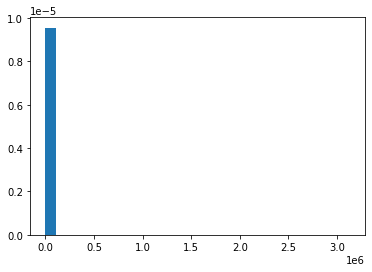

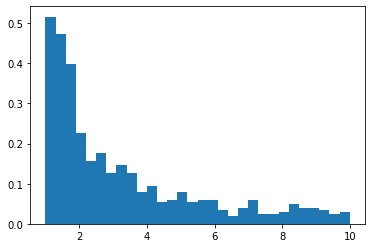

In [3]:
def check_waiting_times(nsamples, alpha, plot_range=None, min_waiting_time=1):
    # plotting probability distribution of waiting times as a check
    waiting_times = np.empty((nsamples))
    for i in range(nsamples):
        waiting_times[i] = get_waiting_time(min_waiting_time, alpha)
    plt.figure()
    plt.hist(waiting_times, bins=30, range=plot_range, density=True)

check_waiting_times(1000, 0.5)
check_waiting_times(1000, 0.5, plot_range=(1,10))

In [4]:
def gaussian_step(D, t, ndim=1):
    
    var = 2*ndim*D*t
    dx = np.random.normal(scale=np.sqrt(var))
    return dx

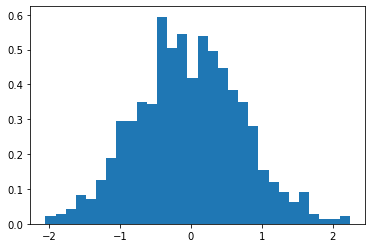

In [5]:
def check_steps(nsamples, D_coeff, t):
    # plotting probability distribution of step lengths as a check

    step_lengths = np.empty((nsamples))
    for i in range(nsamples):
        step_lengths[i] = gaussian_step(D_coeff, t)
    plt.figure()
    plt.hist(step_lengths, bins=30, density=True)
    
check_steps(1000,2.8e11,1e-12)

In [6]:
# CTRW for single particle in 1D
def ctrw(x_start, diff_coeff, diff_time, run_time, min_wait_time, anom_diff_exp, plot=0):
    """
    Be consistent with units
    run_time: simulation time 
    diff_time: diffusion time
    min_wait_time: minimum waiting time
    """
    time = 0
    x = x_start
    times = np.array([time])
    xs = np.array([x])
    while time < run_time:
        waiting_time = get_waiting_time(min_wait_time, anom_diff_exp)
        time += waiting_time
        times = np.append(times, time)
        xs = np.append(xs, xs[-1])
        x += gaussian_step(diff_coeff, diff_time)
        times = np.append(times, time)
        xs = np.append(xs, x)
    
    # correction so run time not exceeded
    times = times[:-2]
    xs = xs[:-2]
    times = np.append(times, run_time)
    xs = np.append(xs, xs[-1])
    
    data = {'t': times, 'x': xs}
    df = pd.DataFrame(data)
    if plot==1:
        %matplotlib inline
        plt.figure(figsize=(12,10))
        plt.plot(df['t'], df['x'])
        plt.xlabel('time (s)')
        plt.ylabel('x position')
        plt.title('1D CTRW')
    return df

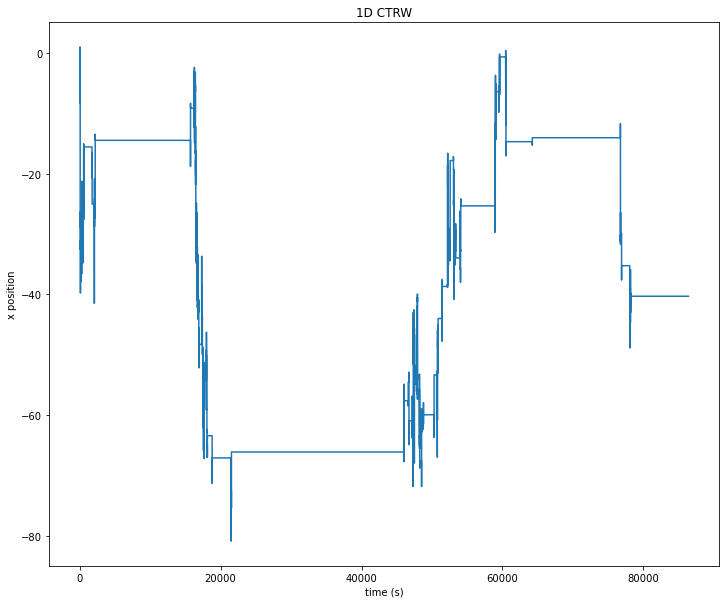

In [7]:
alpha = 0.5
D = 2.8e11  # nm^2/s
t = 1e-12  # jump time in s
A = 0.001  # minimum waiting time in s
run_t = 86400  # simulation run time in s

df = ctrw(0, D, t, run_t, A, alpha, plot=1)

In [8]:
def ctrw_3d(initial_position, diff_coeff, diff_time, run_time, min_wait_time, anom_diff_exp, plot=0):
    """
    """
    time = 0
    x, y, z = initial_position
    times = np.array([time])
    xs = np.array([x])
    ys = np.array([y])
    zs = np.array([z])
    
    while time < run_time:
        waiting_time = get_waiting_time(min_wait_time, anom_diff_exp)
        time += waiting_time  # update current time
        times = np.append(times, time)
        xs = np.append(xs, xs[-1])
        ys = np.append(ys, ys[-1])
        zs = np.append(zs, zs[-1])
        x += gaussian_step(diff_coeff, diff_time)  # update current x position
        y += gaussian_step(diff_coeff, diff_time)  # update current y position
        z += gaussian_step(diff_coeff, diff_time)  # update current z position
        times = np.append(times, time)
        xs = np.append(xs, x)
        ys = np.append(ys, y)
        zs = np.append(zs, z)
    
    # correction so run time not exceeded
    times = times[:-2]
    xs = xs[:-2]
    ys = ys[:-2]
    zs = zs[:-2]
    times = np.append(times, run_time)
    xs = np.append(xs, xs[-1])
    ys = np.append(ys, ys[-1])
    zs = np.append(zs, zs[-1])
    
    data = {'t': times, 'x': xs, 'y': ys, 'z': zs}
    df = pd.DataFrame(data)
                      
    if plot ==1:              
        %matplotlib notebook
        fig = plt.figure()
        ax = plt.axes(projection ='3d')
        ax.plot3D(df['x'], df['y'], df['z'], c='k')
        ax.scatter(df['x'][0], df['y'][0], df['z'][0], c='g')
        ax.scatter(df['x'].iat[-1], df['y'].iat[-1], df['z'].iat[-1], c='r')
    return df

<IPython.core.display.Javascript object>


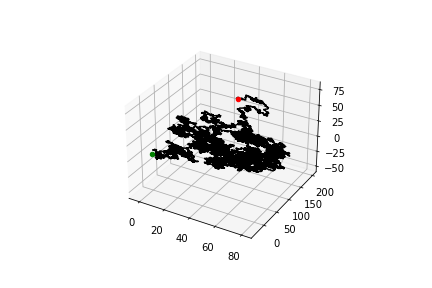

,t,x,y,z
0,0.000000,0.000000,0.000000,0.000000
1,0.027575,0.000000,0.000000,0.000000
2,0.027575,0.081177,-0.788095,0.206144
3,0.029209,0.081177,-0.788095,0.206144
4,0.029209,-0.455543,-1.364775,-0.480064
...,...,...,...,...
30805,76578.523091,43.013392,115.503331,70.441311
30806,76578.523091,42.159970,116.264262,71.116777
30807,76578.545673,42.159970,116.264262,71.116777
30808,76578.545673,43.197788,116.293934,70.388426


In [9]:
alpha = 0.5
D = 2.8e11  # nm^2/s
t = 1e-12  # jump time in s
A = 0.001  # minimum waiting time in s
run_t = 86400  # simulation run time in s

ctrw_3d((0,0,0), D, t, run_t, A, alpha, plot=1)

In [12]:
def gauss_step_3d(xyz_array, diff_coeff, diff_time):
    
    new_coords = np.zeros(3)
    
    xyz_array_row = xyz_array[-1]
    
    xyz_array = np.vstack((xyz_array, xyz_array_row))

    for i,x_i in enumerate(xyz_array_row):
        
        new_coords[i] = x_i + gaussian_step(diff_coeff,diff_time)
        
    xyz_array = np.vstack((xyz_array,new_coords))
    return xyz_array

def get_distance_3d(xyz_array1,xyz_array2):
    #function to get distance between two sets of coordinates
    
    distance = 0
    
    for i,x_i in enumerate(xyz_array1):
        
        distance += (x_i - (xyz_array2[i]))**2
        
    return np.sqrt(distance)

def interaction_process(p):
    #simple call to uniform function if within distance
    #could be altered to consider probability based on distance
    repair = 0 
    q = np.random.uniform(0,1)
    if q < p:
        repair = 1
    return repair

def get_halfway(xyz_array1,xyz_array2):
    
    halfway_coords = np.empty(3)
    
    for i,x_i in enumerate(xyz_array1):
        
        halfway_coords[i] = (x_i + xyz_array2[i])/2
        
    return halfway_coords


In [13]:
def ctrw_3d_interaction(initial_pos, diff_coeff, diff_time, run_time, min_wait_time, anom_diff_exp,
                        int_length, interaction_p=0.5, plot=0, return_trajectories=False):
    """
    initial_pos: 2d array e.g. [(x1,y1,z1), (x2,y2,z2)]
    """
    repair = 0 
    time1 = 0
    time2 = 0 
    
    x1, y1, z1 = initial_pos[0]
    x2, y2, z2 = initial_pos[1]
    
    times1 = np.array([time1])
    times2 = np.array([time2])
    
    coords1 = np.array([[x1, y1, z1]])
    coords2 = np.array([[x2, y2, z2]])
    
    interaction_coords = np.array([[0,0,0,0,0,0]])
    interaction_times = np.array([0])
    interaction_count = 0
    int_count_arr = np.array(interaction_count)
    repair_arr = np.array([repair])
    
    #######################################
    # both particles take an initial step
    """
    if len(times1)==1 and len(times2)==1:
        
        waiting_time1 = get_waiting_time(min_wait_time, anom_diff_exp)
        time1 += waiting_time1
        times1 = np.append(times1, time1)
        times1 = np.append(times1, time1)
        coords1 = gauss_step_3d(coords1, diff_coeff, diff_time)
        
        waiting_time2 = get_waiting_time(min_wait_time, anom_diff_exp)
        time2 += waiting_time2
        times2 = np.append(times2, time2)
        times2 = np.append(times2, time2)
        coords2 = gauss_step_3d(coords2, diff_coeff, diff_time)
        
        if waiting_time1 < waiting_time2:
            
            distance = get_distance_3d(coords1[-1], coords2[0]) ####### THIS SEEMS ODD 
            if distance < int_length:
                interaction_count += 1
                int_coords_temp = np.append(coords1[-1], coords2[0])
                repair = interaction_process(interaction_p)
                int_time = time1
                interaction_times = np.array([int_time])
                interaction_times = np.reshape(interaction_times,(1,len(interaction_times)))
                interaction_coords = np.reshape(int_coords_temp,(1,len(int_coords_temp)))
                int_count_arr = np.array([interaction_count])
                repair_arr = np.array([repair])

            distance = get_distance_3d(coords1[-1],coords2[-1]) ### What is the reason for checking both these parts?
            if distance < int_length:
                interaction_count += 1
                int_coords_temp = np.append(coords1[-1],coords2[-1])
                repair = interaction_process(interaction_p)
                int_time = time2
                if interaction_count == 1:
                    interaction_times = np.array([int_time])
                    interaction_times = np.reshape(interaction_times,(1,len(interaction_times)))
                    interaction_coords = np.reshape(int_coords_temp,(1,len(int_coords_temp)))
                    int_count_arr = np.array([interaction_count])
                    repair_arr = np.array([repair])
                else: 
                    interaction_times = np.vstack((interaction_times,np.array([int_time])))
                    interaction_coords = np.vstack((interaction_coords,int_coords_temp))
                    int_count_arr = np.append(int_count_arr,interaction_count)
                    repair_arr = np.append(repair_arr,repair)
            
        else:
            distance = get_distance_3d(coords1[0], coords2[-1])
            if distance < int_length:
                interaction_count += 1
                int_coords_temp = np.append(coords1[0], coords2[-1])
                repair = interaction_process(interaction_p)
                int_time = time2
                interaction_times = np.array([int_time])
                interaction_times = np.reshape(interaction_times,(1,len(interaction_times)))
                interaction_coords = np.reshape(int_coords_temp,(1,len(int_coords_temp)))
                int_count_arr = np.array([interaction_count])
                repair_arr = np.array([repair])
            
            distance = get_distance_3d(coords1[-1],coords2[-1])
            if distance < int_length:
                interaction_count += 1
                int_coords_temp = np.append(coords1[-1],coords2[-1])
                repair = interaction_process(interaction_p)
                int_time = time1
                if interaction_count == 1:
                    interaction_times = np.array([int_time])
                    interaction_times = np.reshape(interaction_times,(1,len(interaction_times)))
                    interaction_coords = np.reshape(int_coords_temp,(1,len(int_coords_temp)))
                    int_count_arr = np.array([interaction_count])
                    repair_arr = np.array([repair])
                else: 
                    interaction_times = np.vstack((interaction_times,np.array([int_time])))
                    interaction_coords = np.vstack((interaction_coords,int_coords_temp))
                    int_count_arr = np.append(int_count_arr,interaction_count)
                    repair_arr = np.append(repair_arr,repair)
    """
    ########################################
    
    while (time1 < run_time and time2 < run_time) and repair==0:
        
        # the particle that is behind in time takes a step
        if time1 < time2:
            waiting_time1 = get_waiting_time(min_wait_time, anom_diff_exp)
            time1 += waiting_time1
            times1 = np.append(times1, time1)
            times1 = np.append(times1, time1)
            coords1 = gauss_step_3d(coords1, diff_coeff, diff_time)
        else:
            waiting_time2 = get_waiting_time(min_wait_time, anom_diff_exp)
            time2 += waiting_time2
            times2 = np.append(times2, time2)
            times2 = np.append(times2, time2)
            coords2 = gauss_step_3d(coords2, diff_coeff, diff_time)
        
        distance = get_distance_3d(coords1[-1],coords2[-1])
        
        if distance < int_length:
            interaction_count += 1
            int_coords_temp = np.append(coords1[-1],coords2[-1])
            repair = interaction_process(interaction_p)
            if time1 < time2 and time1!=0:
                int_time = time1
            else:
                int_time = time2
            
            if interaction_count == 1:
                interaction_times = np.array([int_time])
                interaction_times = np.reshape(interaction_times,(1,len(interaction_times)))
                interaction_coords = np.reshape(int_coords_temp,(1,len(int_coords_temp)))
                int_count_arr = np.array([interaction_count])
                repair_arr = np.array([repair])
                
            else: 
                interaction_times = np.vstack((interaction_times,np.array([int_time])))
                interaction_coords = np.vstack((interaction_coords,int_coords_temp))
                int_count_arr = np.append(int_count_arr,interaction_count)
                repair_arr = np.append(repair_arr,repair)
    
    #######################################
    
    if repair==1:
        # record final position at time of repair 
        if time1 > time2:
            times2 = np.append(times2, time1)
            coords2 = np.vstack((coords2, coords2[-1]))
        else:
            times1 = np.append(times1, time2)
            coords1 = np.vstack((coords1, coords1[-1]))
    
    if repair==0:
        # correction so run time not exceeded
        if time1 > run_time:
            times1 = times1[:-2]
            coords1 = coords1[:-2]
        if time2 > run_time:
            times2 = times2[:-2]
            coords2 = coords2[:-2]
        if times1[-1] < run_time:
            times1 = np.append(times1, run_time)
            coords1 = np.vstack((coords1, coords1[-1]))
        if times2[-1] < run_time:
            times2 = np.append(times2, run_time)
            coords2 = np.vstack((coords2, coords2[-1]))
    
    data1 = {'t': times1, 'x': coords1[:,0], 'y': coords1[:,1], 'z': coords1[:,2]}
    df1 = pd.DataFrame(data1)
    data2 = {'t': times2, 'x': coords2[:,0], 'y': coords2[:,1], 'z': coords2[:,2]}
    df2 = pd.DataFrame(data2)
    
    if plot==1:              
        %matplotlib notebook
        fig = plt.figure(figsize=(10,10))
        ax = plt.axes(projection ='3d')
        ax.plot3D(df1['x'], df1['y'], df1['z'])
        ax.plot3D(df2['x'], df2['y'], df2['z'])
        ax.set_title('Interaction count: {},   Repair: {} \n Ran for {} s'.format(interaction_count, repair, times1[-1]))
        ax.set_xlabel('x (nm)')
        ax.set_ylabel('y (nm)')
        ax.set_zlabel('z (nm)')
        ax.scatter(df1['x'][0], df1['y'][0], df1['z'][0], marker='x', c='lime')
        ax.scatter(df2['x'][0], df2['y'][0], df2['z'][0], marker='x', c='lime')
        ax.scatter(df1['x'].iat[-1], df1['y'].iat[-1], df1['z'].iat[-1], marker='x', c='red')
        ax.scatter(df2['x'].iat[-1], df2['y'].iat[-1], df2['z'].iat[-1], marker='x', c='red')
        if interaction_count > 1:
            for i, coords in enumerate(interaction_coords):
                ax.plot3D([coords[0], coords[3]], [coords[1], coords[4]], [coords[2], coords[5]], c='k', ls='dotted')
                if repair==1 and i==interaction_count-1:
                    ax.plot3D([coords[0], coords[3]], [coords[1], coords[4]], [coords[2], coords[5]], c='m', ls='dashed')

    if return_trajectories:
        return interaction_times, interaction_coords, int_count_arr, repair_arr, df1, df2
    else:
        return interaction_times, interaction_coords, int_count_arr, repair_arr
            

<IPython.core.display.Javascript object>


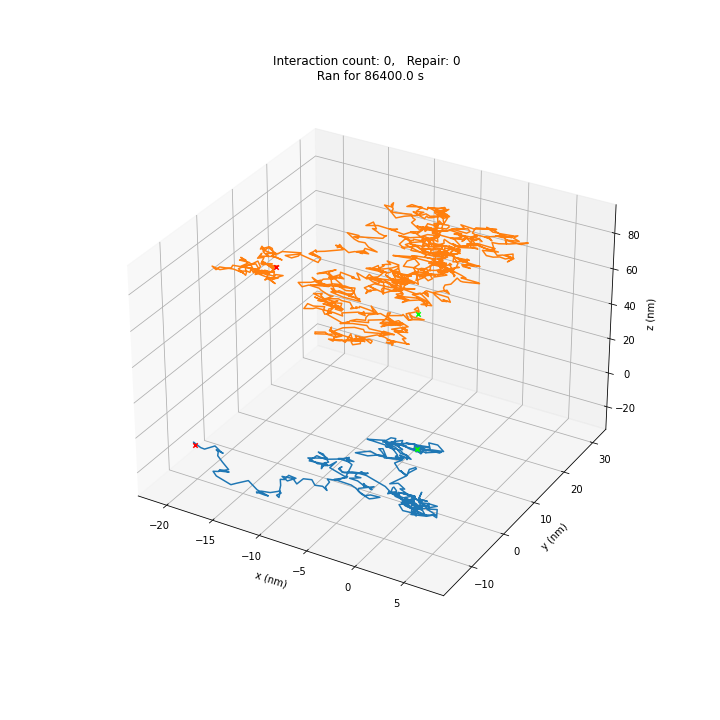

In [14]:
#min_dist  = 50  # in nm
interaction_range = 50  # in nm 
interaction_probability = 0.1

alpha = 0.5
D = 2.8e11  # nm^2/s
jump_t = 1e-12  # jump time in s
min_t = 0.1  # minimum waiting time in s
run_t = 86400  # simulation run time in s

ts,xyzs,counts,repair,df1,df2 = ctrw_3d_interaction([(0,0,0),(0,0,interaction_range*1.5)], D, jump_t, run_t, min_t, alpha,
                                                    interaction_range, interaction_p=interaction_probability,
                                                    plot=1, return_trajectories=True)

In [15]:
def ctrw_3d_interaction_mc(nsamples, initial_pos, diff_coeff, diff_time, run_time, min_wait_time, anom_diff_exp,
                           int_length, interaction_p=0.5, plot=0):
    
    j = 0
    
    for i in np.arange(nsamples):
        
        ts_temp,xyzs_temp,counts_temp,repair_temp = ctrw_3d_interaction(initial_pos, diff_coeff, diff_time, run_time,
                                                                        min_wait_time, anom_diff_exp, 
                                                                        int_length, interaction_p=interaction_p, plot=plot)
     
        repair_temp = np.reshape(repair_temp,(len(repair_temp),1))
        counts_temp = np.reshape(counts_temp,(np.size(counts_temp),1))
        
        if counts_temp[0] != 0:
        
            mc_sample = np.full((len(counts_temp),1),i)

            data_temp = np.hstack((mc_sample,ts_temp,xyzs_temp,counts_temp,repair_temp))

            if j == 0:
                repair_data = data_temp

            else: 
                repair_data = np.vstack((repair_data,data_temp))
                
            j+=1
                
    if j != 0:
        repair_df = pd.DataFrame(data=repair_data, columns=['mc_step', 't','x1','y1','z1','x2','y2','z2','interaction','repair'])
    
    else:
        repair_df = pd.DataFrame()
        
    return repair_df
    

In [16]:
repair_data = ctrw_3d_interaction_mc(100,[(0,0,0),(0,0,interaction_range*1)], D, jump_t, run_t, min_t, 0.5,
                                       interaction_range,interaction_p = 0.1,plot=0)

In [17]:
repair_data

,mc_step,t,x1,y1,z1,x2,y2,z2,interaction,repair
0,0.0,45.035798,-0.502668,-1.289254,0.849329,0.584319,0.560406,50.449880,1.0,0.0
1,0.0,45.173136,0.143079,-0.118180,0.553885,0.584319,0.560406,50.449880,2.0,0.0
2,0.0,45.673322,-0.989354,-1.177716,0.698077,0.584319,0.560406,50.449880,3.0,1.0
3,1.0,1.467782,0.000000,0.000000,0.000000,0.190534,-0.276173,49.637637,1.0,0.0
4,1.0,0.109233,1.419137,-0.227108,0.749795,0.190534,-0.276173,49.637637,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
744,99.0,1.466597,0.000000,0.000000,0.000000,0.500825,-0.338501,49.885170,1.0,0.0
745,99.0,0.909395,0.033187,0.168828,0.986910,0.500825,-0.338501,49.885170,2.0,0.0
746,99.0,1.063127,-1.175736,0.193446,-0.070959,0.500825,-0.338501,49.885170,3.0,0.0
747,99.0,62.897917,0.090206,2.407967,0.332028,7.147886,-1.225595,48.602756,4.0,0.0


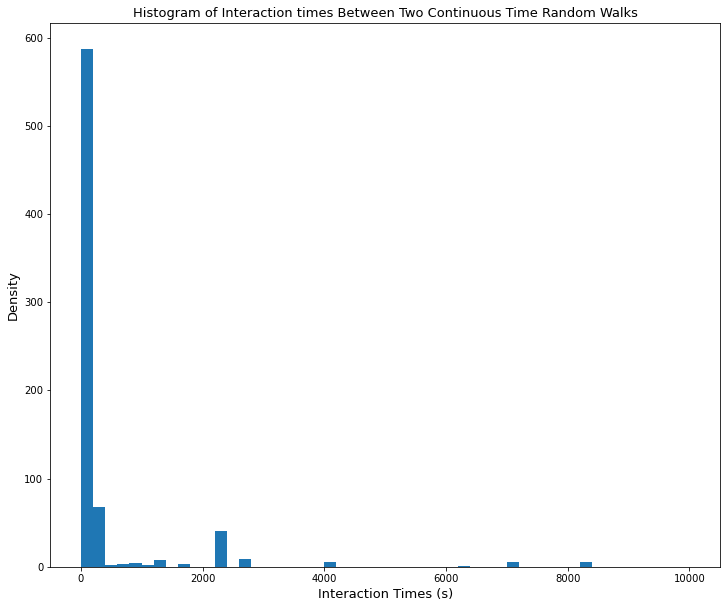

In [18]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(12,10))
ax.hist(repair_data['t'], bins=50,range=(0,10000))
ax.set_xlabel('Interaction Times (s)',fontsize=13)
ax.set_ylabel('Density',fontsize=13)
plt.title('Histogram of Interaction times Between Two Continuous Time Random Walks',fontsize=13)

plt.show()

Repaired 84 / 100 within run time 86400 s
Mean no. of interactions before repair: 8.286


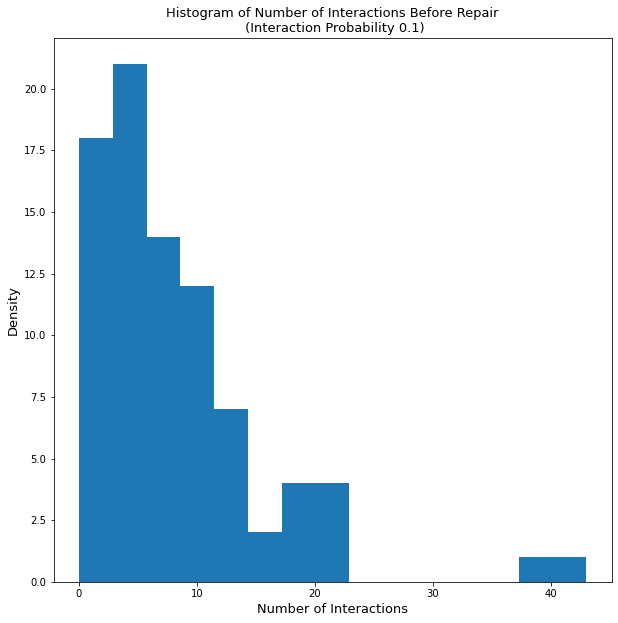

In [19]:
repair_events = repair_data[repair_data['repair']==1.0]
repair_count = repair_events['interaction']
fig,ax = plt.subplots(figsize=(10,10))
plt.hist(repair_count,bins='auto',range=(0,max(repair_count)))
ax.set_xlabel('Number of Interactions',fontsize=13)
ax.set_ylabel('Density',fontsize=13)
plt.title('Histogram of Number of Interactions Before Repair\n (Interaction Probability {})'.format(interaction_probability),
          fontsize=13)

print('Repaired {} / {} within run time {} s'.format(len(repair_events), 1+int(repair_data['mc_step'].iat[-1]), run_t))
print('Mean no. of interactions before repair: {:.3f}'.format(np.mean(repair_count)))

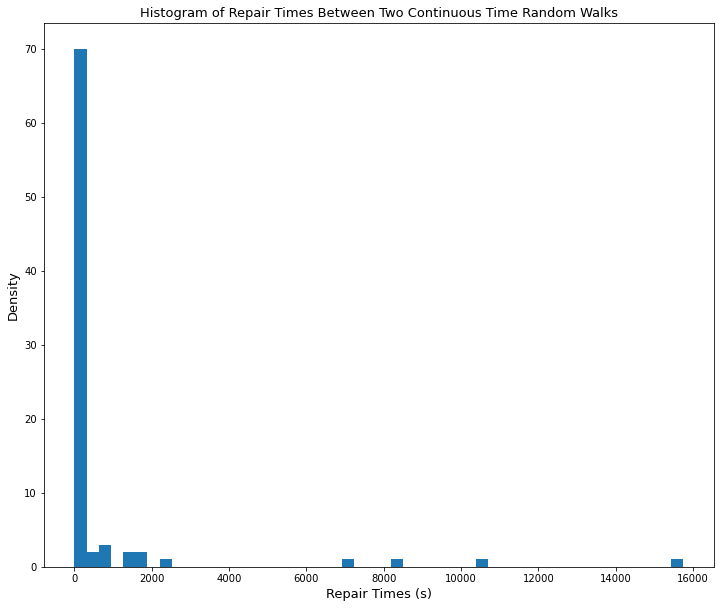

In [20]:
fig,ax = plt.subplots(figsize=(12,10))
repair_times = repair_events['t']
ax.hist(repair_times,bins=50)
ax.set_xlabel('Repair Times (s)',fontsize=13)
ax.set_ylabel('Density',fontsize=13)
plt.title('Histogram of Repair Times Between Two Continuous Time Random Walks',fontsize=13)

plt.show()

In [24]:
def ctrw_interaction_mc_D(nsamples_per_D, repeats, initial_pos, diff_coeffs, diff_time, run_time, min_wait_time, anom_diff_exp,
                          int_length, interaction_p=0.5, plot=0):
    
    repair_avgs = np.empty(len(diff_coeffs))
    repair_stds = np.empty(len(diff_coeffs))
    
    for k,D in enumerate(diff_coeffs):
        
        temp_repair_rates = np.empty(repeats)
        
        for i in np.arange(repeats):
#             data = ctrw_3d_interaction_mc(nsamples_per_D, initial_pos, D, t, run_t, A, 0.5,
#                                            int_length,interaction_p = interaction_p,plot=plot)
            data = ctrw_3d_interaction_mc(nsamples_per_D, initial_pos, D, diff_time, run_time, min_wait_time, anom_diff_exp,
                                          int_length, interaction_p=interaction_p, plot=plot)
           # print(data)
            if len(data.index) == 0:
                temp_repair_rates[i] = np.NaN
            else:  
                repair_events = len(data[data['repair']==1.0])
                temp_repair_rates[i] = repair_events
            
        repair_avgs[k] = np.nanmean(temp_repair_rates)
        repair_stds[k] = np.nanstd(temp_repair_rates)
        
    return repair_avgs, repair_stds

def ctrw_interaction_mc_D_r(nsamples_per_D, repeats, separations, diff_coeffs, diff_time, run_time, min_wait_time, anom_diff_exp,
                           int_length, interaction_p=0.5, plot=0):
    
    N_rows = int(len(diff_coeffs)*len(separations))
    print(N_rows)
    
    repair_data_D_r = np.empty((N_rows,4)) 

    
    for j,r in enumerate(separations):
        
        print('-----')
        
        initial_pos = [(0,0,0),(0,0,r)]
                                 
        repair_avgs = np.empty(len(diff_coeffs))
        repair_stds = np.empty(len(diff_coeffs))
    
        for k,D in enumerate(diff_coeffs):
            
            print(j*len(diff_coeffs)+k)
            print(r,D)

            temp_repair_rates = np.empty(repeats)

            for i in np.arange(repeats):
                
                data = ctrw_3d_interaction_mc(nsamples_per_D, initial_pos, D, diff_time, run_time, min_wait_time, anom_diff_exp,
                                              int_length, interaction_p=interaction_p, plot=plot)
               # print(data)
                if len(data.index) == 0:

                    temp_repair_rates[i] = 0
                else:  
                    repair_events = len(data[data['repair']==1.0])
                    temp_repair_rates[i] = repair_events

            repair_avg = np.nanmean(temp_repair_rates)
            repair_std = np.nanstd(temp_repair_rates)
            
            repair_data_row = np.array([r,D,repair_avg,repair_std])
            repair_data_D_r[j*len(diff_coeffs)+k] = repair_data_row

            
    repair_df_D_r = pd.DataFrame(data=repair_data_D_r, columns=['r','D','Repair Rate','Repair Rate Std'])                 
        
    return repair_df_D_r

In [25]:
D_vals = 2.8*np.logspace(7,17,num=11)
repair_avgs,repair_stds = ctrw_interaction_mc_D(50,3,[(0,0,0),(0,0,interaction_range)], D_vals, jump_t, run_t, min_t, 0.5,
                                                interaction_range)

In [26]:
print(repair_avgs,repair_stds)

[47.66666667 48.         48.33333333 46.66666667 47.66666667 46.33333333
 40.         25.66666667  4.66666667  1.          0.        ] [0.94280904 0.         1.69967317 0.94280904 0.47140452 0.94280904
 2.1602469  2.3570226  1.24721913 0.         0.        ]


Text(0, 0.5, 'Repair Rate')

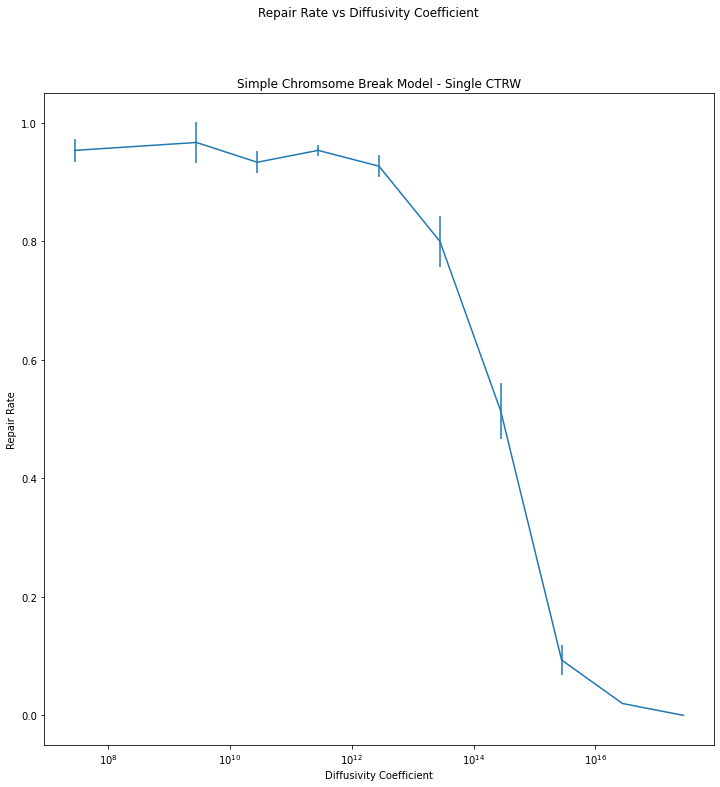

In [27]:
fig,ax = plt.subplots(figsize=(12,12))
plt.suptitle('Repair Rate vs Diffusivity Coefficient')
plt.title('Simple Chromsome Break Model - Single CTRW')
plt.errorbar(x=D_vals,y=repair_avgs/50,yerr=repair_stds/50)
ax.set_xscale('log')
ax.set_xlabel('Diffusivity Coefficient')
ax.set_ylabel('Repair Rate')

In [34]:
r_vals = np.arange(interaction_range*0.5,interaction_range*3.5,0.5*interaction_range)
D_vals = 2.8*np.logspace(7,16,num=19)

repair_df_D_r = ctrw_interaction_mc_D_r(100, 5, r_vals, D_vals, jump_t, run_t, min_t, 0.5,interaction_range, interaction_p = 0.1)

114
-----
0
25.0 28000000.0
1
25.0 88543774.48471461
2
25.0 280000000.0
3
25.0 885437744.8471463
4
25.0 2800000000.0
5
25.0 8854377448.471462
6
25.0 28000000000.0
7
25.0 88543774484.71461
8
25.0 280000000000.0
9
25.0 885437744847.1462
10
25.0 2800000000000.0
11
25.0 8854377448471.46
12
25.0 28000000000000.0
13
25.0 88543774484714.61
14
25.0 279999999999999.97
15
25.0 885437744847146.1
16
25.0 2800000000000000.0
17
25.0 8854377448471462.0
18
25.0 2.8e+16
-----
19
50.0 28000000.0
20
50.0 88543774.48471461
21
50.0 280000000.0
22
50.0 885437744.8471463
23
50.0 2800000000.0
24
50.0 8854377448.471462
25
50.0 28000000000.0
26
50.0 88543774484.71461
27
50.0 280000000000.0
28
50.0 885437744847.1462
29
50.0 2800000000000.0
30
50.0 8854377448471.46
31
50.0 28000000000000.0
32
50.0 88543774484714.61
33
50.0 279999999999999.97
34
50.0 885437744847146.1
35
50.0 2800000000000000.0
36
50.0 8854377448471462.0
37
50.0 2.8e+16
-----
38
75.0 28000000.0
39
75.0 88543774.48471461
40
75.0 280000000.0
41
75.0

In [35]:
print(len(D_vals),len(r_vals))
repair_df_D_r

19 6


,r,D,Repair Rate,Repair Rate Std
0,25.0,2.800000e+07,98.6,1.496663
1,25.0,8.854377e+07,98.6,0.489898
2,25.0,2.800000e+08,99.0,0.632456
3,25.0,8.854377e+08,98.8,0.748331
4,25.0,2.800000e+09,99.4,0.489898
...,...,...,...,...
109,150.0,2.800000e+14,7.2,2.561250
110,150.0,8.854377e+14,2.2,0.748331
111,150.0,2.800000e+15,0.2,0.400000
112,150.0,8.854377e+15,0.4,0.489898


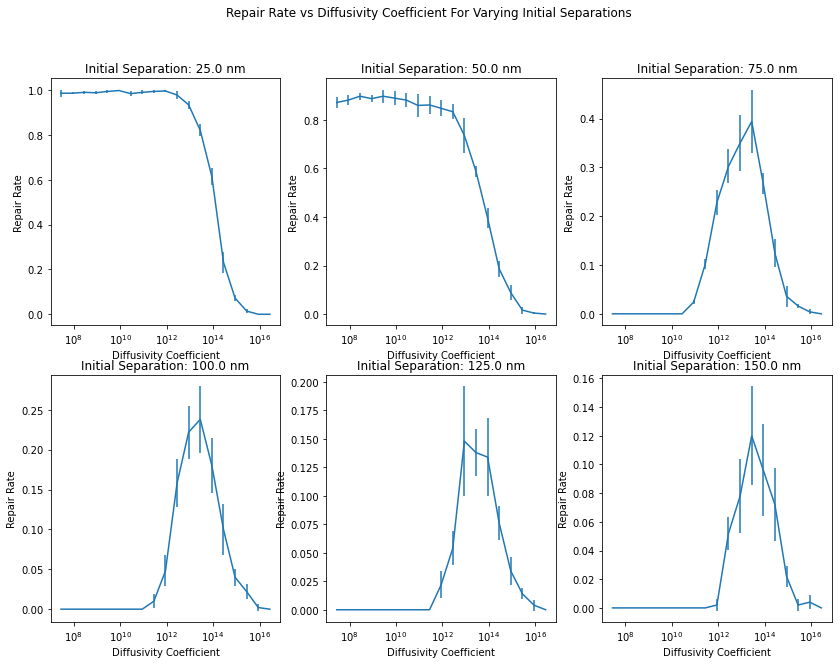

In [36]:
"""
data50 = repair_df_D_r[repair_df_D_r['r']==50.0]
data100 = repair_df_D_r[repair_df_D_r['r']==75.0]

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,8))
plt.suptitle('Repair Rate vs Diffusivity Coefficient')
plt.title('Simple Chromsome Break Model - Single CTRW')

ax1.errorbar(x=data50['D'],y=data50['Repair Rate']/50,yerr=data50['Repair Rate Std']/50)
ax1.set_xscale('log')
ax1.set_xlabel('Diffusivity Coefficient')
ax1.set_ylabel('Repair Rate')

ax2.errorbar(x=data100['D'],y=data100['Repair Rate']/50,yerr=data100['Repair Rate Std']/50)
ax2.set_xscale('log')
ax2.set_xlabel('Diffusivity Coefficient')
ax2.set_ylabel('Repair Rate')
"""

def plot_r_and_D(repair_df_D_r,reps):
    
    fig,axes = plt.subplots(2,3,figsize=(14,10))
    plt.suptitle('Repair Rate vs Diffusivity Coefficient For Varying Initial Separations')
    for i,r in enumerate(r_vals):

        data = repair_df_D_r[repair_df_D_r['r']==r]

        axes.flat[i].errorbar(x=data['D'],y=data['Repair Rate']/reps,yerr=data['Repair Rate Std']/reps)
        axes.flat[i].set_xscale('log')
        axes.flat[i].set_xlabel('Diffusivity Coefficient')
        axes.flat[i].set_ylabel('Repair Rate')
        
        axes.flat[i].set_title('Initial Separation: {} nm'.format(r))
    

    
    
plot_r_and_D(repair_df_D_r,100)
    

In [55]:
def unit_vector_single():
    #Streamlined function to return only a single vector, distributed in the same manner as above.
    #Plotting of the above vectors in large quantity attest the validity of using this function.
    
    random_value_1 = np.random.uniform(0,1)
    random_value_2 = np.random.uniform(0,1)
    
    #ICDFs produced as before
    inclination = np.arccos(1-2*random_value_1)
    azimuth = 2*(np.pi)*random_value_2
    
    #cartesian conversion
    x = np.cos(azimuth)*np.sin(inclination)
    y = np.sin(azimuth)*np.sin(inclination)
    z = np.cos(inclination)
    
    return np.array([x,y,z])

def ctrw_3d_self_interaction(initial_pos,diff_coeff,diff_time,run_time,min_wait_time,anom_diff_exp,
                        int_length,strand_length,interaction_p=0.5,plot=0):
    """
    """
    repair = 0 
    time1 = 0
    time2 = 0 
    
    x1, y1, z1 = initial_pos
    x2, y2, z2 = initial_pos + strand_length*unit_vector_single()

    times1 = np.array([time1])
    times2 = np.array([time2])
    
    coords1 = np.array([[x1, y1, z1]])
    coords2 = np.array([[x2, y2, z2]])
    
    interaction_coords = np.array([0,0,0,0,0,0])
    interaction_times = np.array([0])
    interaction_count = 0
    
    int_count_arr = np.array(interaction_count)
    repair_arr = np.array([repair])

    while (time1 < run_time or time2 < run_time) and repair ==0:
        
        """
        waiting_time1 = get_waiting_time(min_wait_time, anom_diff_exp)
        waiting_time2 = get_waiting_time(min_wait_time, anom_diff_exp)
        
        time1 += waiting_time1  # update current time
        times1 = np.append(times1, time1)
        
        time2 += waiting_time2  # update current time
        times2 = np.append(times2, time2)
        
        coords1_temp = gauss_step_3d(coords1,diff_coeff, diff_time)
        coords2_temp = gauss_step_3d(coords2,diff_coeff, diff_time)
        
        coords_temp = np.array([coords1_temp,coords2_temp])
        """
        coords1_temp = coords1
        coords2_temp = coords2
        
        # the particle that is behind in time takes a step
        if time1 < time2:
            waiting_time1 = get_waiting_time(min_wait_time, anom_diff_exp)
            time1 += waiting_time1
            times1 = np.append(times1, time1)
            times1 = np.append(times1, time1)
            coords1 = gauss_step_3d(coords1, diff_coeff, diff_time)
        else:
            waiting_time2 = get_waiting_time(min_wait_time, anom_diff_exp)
            time2 += waiting_time2
            times2 = np.append(times2, time2)
            times2 = np.append(times2, time2)
            coords2 = gauss_step_3d(coords2, diff_coeff, diff_time)
            
        distance = get_distance_3d(coords1[-1],coords2[-1])
        
        coords_tt = np.array([coords1_,coords2])

        while (distance > strand_length):
            
            coords_tt = coords_temp
               
            i = np.random.randint(0,1)
            
            print(coords_tt[i])
            print(coords_temp[i])
               
            coords_tt[i] = gauss_step_3d(coords_temp[i],diff_coeff, diff_time)
            
            print(coords_tt[i])
            print(coords_temp[i])
            
            distance = get_distance_3d(coords_tt[0][-1],coords_tt[1][-1])
            
        coords1,coords2 = coords_tt

        if distance < int_length:
            
            interaction_count += 1
            int_coords_temp = np.append(coords1[-1],coords2[-1])
            repair = interaction_process(interaction_p)
            
            if interaction_count == 1:
                interaction_times = np.array([time1,time2])
                interaction_times = np.reshape(interaction_times,(1,len(interaction_times)))
                interaction_coords = np.reshape(int_coords_temp,(1,len(int_coords_temp)))
                int_count_arr = np.array([interaction_count])
                repair_arr = np.array([repair])
                
            else: 
                interaction_times = np.vstack((interaction_times,np.array([time1,time2])))
                interaction_coords = np.vstack((interaction_coords,int_coords_temp))
                int_count_arr = np.append(int_count_arr,interaction_count)
                repair_arr = np.append(repair_arr,repair)


    data1 = {'t': times1, 'x': coords1[:,0], 'y': coords1[:,1], 'z': coords1[:,2]}
    df1 = pd.DataFrame(data1)
    data2 = {'t': times2, 'x': coords2[:,0], 'y': coords2[:,1], 'z': coords2[:,2]}
    df2 = pd.DataFrame(data2)
    
    
    """
    if plot ==1:              
        %matplotlib notebook
        fig = plt.figure()
        ax = plt.axes(projection ='3d')
        ax.plot3D(df1['x'], df1['y'], df1['z'])
        ax.plot3D(df2['x'], df2['y'], df2['z'])
        ax.scatter(df1['x'].iloc[0], df1['y'].iloc[0], df1['z'].iloc[0],marker='x',c='k')
        ax.scatter(df2['x'].iloc[0], df2['y'].iloc[0], df2['z'].iloc[0],marker='x',c='k')
        
        if interaction_count > 1:
            ax.scatter(interaction_coords[:-1,0],interaction_coords[:-1,1],
                       interaction_coords[:-1,2],c='k')
            if repair == 1:
                ax.scatter(interaction_coords[-1,0],interaction_coords[-1,1],
                       interaction_coords[-1,2],c='r')
                
        elif interaction_count == 1:
            ax.scatter(interaction_coords[0],interaction_coords[1],
                       interaction_coords[2],c='k')
            if repair == 1:
                ax.scatter(interaction_coords[-0],interaction_coords[1],
                       interaction_coords[2],c='r')
                       
    """
        
    return interaction_times,interaction_coords,int_count_arr,repair_arr

In [236]:
def repair_process(interaction_index,interaction_p):
    """
    Updated Function to also cnsider misrepairs
    """
    repair = interaction_process(interaction_p)
    
    #index 0 = i12, index 5 = i34, which are ends of same pair
    # if not these indices, misrepair between diff strands
    if interaction_index != 0 and interaction_index != 5:
    
        repair = repair*(-1)
        
    return repair

def check_interaction(t1,t2,t3,t4,c1,c2,c3,c4,i_range,int_in,int_p):
    """
    Function to take positions, times and check for interactions or repair
    t1-t4 are current walk times, c1-c4 are their coordinates xyz
    i_range is interaction range, int_in is exisiting interaction array
    int_in has form: [[interaction_time,i12,i13,i14,i23,i24,i34,repair]]
    Where i12 is a tally of interactions between 1 and 2 etc, repair is 1,0,-1
    for repair,no repair, or misrepair
    int_p is repair probability
    """
    
    #array of combinations of times and coordinates to iterate through later
    times = np.array([[t1,t2],[t1,t3],[t1,t4],[t2,t3],[t2,t4],[t3,t4]],dtype=object)
    coords = np.array([[c1,c2],[c1,c3],[c1,c4],[c2,c3],[c2,c4],[c3,c4]],dtype=object)
    #distances = np.zeros(6)
    
    #empty array for interaction times for all 6 possible combinations 12,13...34
    interaction_t = np.zeros(6)
    #array with original indices and room for time of interaction, for sorting
    int_i_and_t = np.array([[0,0],[1,0],[2,0],[3,0],[4,0],[5,0]])
    
    for i,cc in enumerate(coords):
        
        distance = get_distance_3d(cc[0],cc[1])
       # distances[i] = distance
        
        if distance < i_range:
            print('!')
            
            int_t = np.min(times[i])
            print(int_t)
            int_i_and_t[i,1] =  int_t
            interaction_t[i]  = int_t
    
    print(int_i_and_t)
    i_sort = np.argsort(interaction_t)
    i_and_t_sorted = int_i_and_t[i_sort]
    
    #int_row_in = [[t,12,13,14,23,24,34,r]]
    #int_row_in[-1] = [t,12,13,14,23,24,34,r]
    int_out_temp = int_in
    int_row_out_temp = int_out_temp[-1]
           
    repair = 0
    jj = 1 
    
    while repair == 0 and jj < 7: 
        
        #print(int_row_out_temp)
        
        i = i_and_t_sorted[jj-1][0]
        t = i_and_t_sorted[jj-1][1]

        #check if interaction actually occured, once repair happens, finish
        if t != 0:
            
            int_row_out_temp[0] = t
            int_row_out_temp[i+1] += 1
            
            repair_temp = repair_process(i,int_p)
            int_row_out_temp[7] = repair_temp
            
            if jj == 1: 
                
                int_out_temp = int_row_out_temp
                
            else:
                
                int_out_temp = np.vstack((int_out_temp,int_row_out_temp))
            
            repair = repair_temp
        
        jj += 1 
        
    #int_out = np.vstack((int_in,int_out_temp))
                 
    return int_out_temp,repair


In [240]:
def step_check_time_f(time1,time2,times1,times2,coords1,coords2,diff_coeff,diff_time,min_wait_time,anom_diff_exp):
    
    if time1 < time2:
        waiting_time1 = get_waiting_time(min_wait_time, anom_diff_exp)
        time1 += waiting_time1
        times1 = np.append(times1, time1)
        times1 = np.append(times1, time1)
        coords1 = gauss_step_3d(coords1, diff_coeff, diff_time)
        
    else:
        waiting_time2 = get_waiting_time(min_wait_time, anom_diff_exp)
        time2 += waiting_time2
        times2 = np.append(times2, time2)
        times2 = np.append(times2, time2)
        coords2 = gauss_step_3d(coords2, diff_coeff, diff_time)
        
    
        
    return time1,time2,times1,times2,coords1,coords2

def ctrw_pair(timej,timejj,timesj,timesjj,coordsj,coordsjj,
              diff_coeff,diff_time,min_wait_time,anom_diff_exp):
    
    timej_t,timejj_t,timesj_t,timesjj_t,coordsj_t,coordsjj_t = step_check_time_f(timej,timejj,timesj,timesjj,coordsj,
                                                                                  coordsjj,diff_coeff,diff_time,min_wait_time,
                                                                                  anom_diff_exp)
    distance_j_jj = get_distance_3d(coordsj_t[-1],coordsjj_t[-1])
        
    #repeat increments of time/space until correct spatial dispalcement found
    #distance must be less than strand length
    #Crude implementation currently, ideally just step in space would be recalculated

    while distance_j_jj > strand_length:
        #print('!')
            
        timej_t,timejj_t,timesj_t,timesjj_t,coordsj_t,coordsjj_t = step_check_time_f(time1,time2,times1,times2,coords1,coords2,
                                                                                  diff_coeff,diff_time,min_wait_time,
                                                                                  anom_diff_exp)
            
        distance_j_jj = get_distance_3d(coordsj_t[-1],coordsjj_t[-1])
        
    timej,timejj,timesj,timesjj,coordsj,coordsjj = timej_t,timejj_t,timesj_t,timesjj_t,coordsj_t,coordsjj_t
        
    return timej_t,timejj_t,timesj_t,timesjj_t,coordsj_t,coordsjj_t,distance_j_jj

def get_strand_end_pos(initial_pos,strand_length):
    
    x1, y1, z1 = initial_pos
    x2, y2, z2 = initial_pos + np.random.uniform()*strand_length*unit_vector_single()
    
    return x1,y1,z1,x2,y2,z2

def two_coupled_ctrw(initial_pos, diff_coeff, diff_time, run_time, min_wait_time, anom_diff_exp,
                              int_length,strand_length, interaction_p=0.5):
    """
    initial_pos: 2d array e.g. [(x1,y1,z1), (x2,y2,z2)]
    """
    repair = 0 
    int_t = 0
    
    time1,time2,time3,time4 = 0,0,0,0
    
    x1, y1, z1, x2, y2, z2 = get_strand_end_pos(initial_pos[0],strand_length)
    x3, y3, z3, x4, y4, z4 = get_strand_end_pos(initial_pos[1],strand_length)

    times1 = np.array([time1])
    times2 = np.array([time2])
    times3 = np.array([time3])
    times4 = np.array([time4])
    
    times = np.array([time1,time2,time3,time4])
    
    coords1 = np.array([[x1, y1, z1]])
    coords2 = np.array([[x2, y2, z2]])
    coords3 = np.array([[x3, y3, z3]])
    coords4 = np.array([[x4, y4, z4]])
    
    #possible correct repair counts
    i12,i34 = 0,0
    #possible misrepair counts
    i13,i14,i23,i24 = 0,0,0,0
    
    #interaction_times = np.array([0])
    int_arr = np.array([[int_t,i12,i13,i14,i23,i24,i34,repair]])
    
    while (all(t < run_time for t in times) == True) and (repair == 0):

        time1,time2,times1,times2,coords1,coords2,distance12 = ctrw_pair(time1,time2,times1,times2,coords1,
                                                                         coords2,diff_coeff,diff_time,min_wait_time,
                                                                         anom_diff_exp)
        
        time3,time4,times3,times4,coords3,coords4,distance34 = ctrw_pair(time3,time4,times3,times4,coords3,
                                                                         coords4,diff_coeff,diff_time,min_wait_time,
                                                                         anom_diff_exp)
        c1 = coords1[-1]
        c2 = coords2[-1]
        c3 = coords3[-1]
        c4 = coords4[-1]
        
        int_arr,repair = check_interaction(time1,time2,time3,time4,c1,c2,c3,c4,int_length,int_arr,interaction_p)
        
        
        #print(int_arr)
      
    """
        if distance < int_length:
            
            interaction_count += 1
            int_coords_temp = np.append(coords1[-1],coords2[-1])
            repair = interaction_process(interaction_p)
            if time1 < time2 and time1!=0:
                int_time = time1
            else:
                int_time = time2
            
            if interaction_count == 1:
                interaction_times = np.array([int_time])
                interaction_times = np.reshape(interaction_times,(1,len(interaction_times)))
                interaction_coords = np.reshape(int_coords_temp,(1,len(int_coords_temp)))
                int_count_arr = np.array([interaction_count])
                repair_arr = np.array([repair])
                
            else: 
                interaction_times = np.vstack((interaction_times,np.array([int_time])))
                interaction_coords = np.vstack((interaction_coords,int_coords_temp))
                int_count_arr = np.append(int_count_arr,interaction_count)
                repair_arr = np.append(repair_arr,repair)
    
    if repair==1:
        # record final position at time of repair 
        if time1 > time2:
            times2 = np.append(times2, time1)
            coords2 = np.vstack((coords2, coords2[-1]))
        else:
            times1 = np.append(times1, time2)
            coords1 = np.vstack((coords1, coords1[-1]))
    
    if repair==0:
        # correction so run time not exceeded
        if time1 > run_time:
            times1 = times1[:-2]
            coords1 = coords1[:-2]
        if time2 > run_time:
            times2 = times2[:-2]
            coords2 = coords2[:-2]
        if times1[-1] < run_time:
            times1 = np.append(times1, run_time)
            coords1 = np.vstack((coords1, coords1[-1]))
        if times2[-1] < run_time:
            times2 = np.append(times2, run_time)
            coords2 = np.vstack((coords2, coords2[-1]))
            
    
    
    data1 = {'t': times1, 'x': coords1[:,0], 'y': coords1[:,1], 'z': coords1[:,2]}
    df1 = pd.DataFrame(data1)
    data2 = {'t': times2, 'x': coords2[:,0], 'y': coords2[:,1], 'z': coords2[:,2]}
    df2 = pd.DataFrame(data2)
    
    if plot==1:              
        %matplotlib notebook
        fig = plt.figure(figsize=(10,10))
        ax = plt.axes(projection ='3d')
        ax.plot3D(df1['x'], df1['y'], df1['z'])
        ax.plot3D(df2['x'], df2['y'], df2['z'])
        ax.set_title('Interaction count: {},   Repair: {} \n Ran for {} s'.format(interaction_count, repair, times1[-1]))
        ax.set_xlabel('x (nm)')
        ax.set_ylabel('y (nm)')
        ax.set_zlabel('z (nm)')
        ax.scatter(df1['x'][0], df1['y'][0], df1['z'][0], marker='x', c='lime')
        ax.scatter(df2['x'][0], df2['y'][0], df2['z'][0], marker='x', c='lime')
        ax.scatter(df1['x'].iat[-1], df1['y'].iat[-1], df1['z'].iat[-1], marker='x', c='red')
        ax.scatter(df2['x'].iat[-1], df2['y'].iat[-1], df2['z'].iat[-1], marker='x', c='red')
        if interaction_count > 1:
            for i, coords in enumerate(interaction_coords):
                ax.plot3D([coords[0], coords[3]], [coords[1], coords[4]], [coords[2], coords[5]], c='k', ls='dotted')
                if repair==1 and i==interaction_count-1:
                    ax.plot3D([coords[0], coords[3]], [coords[1], coords[4]], [coords[2], coords[5]], c='m', ls='dashed')

    if return_trajectories:
        return interaction_times, interaction_coords, int_count_arr, repair_arr, df1, df2
    else:
    """
    return int_arr
            

In [241]:
interaction_range = 50  # in nm 
interaction_probability = 0.1

alpha = 0.5
D = 2.8e11  # nm^2/s
jump_t = 1e-12  # jump time in s
min_t = 0.1  # minimum waiting time in s
run_t = 1000 #86400  # simulation run time in s

int_length = 25
strand_length = 100
separation = 25 

In [242]:
two_coupled_ctrw([(0,0,0),(0,0,separation)], D, jump_t, run_t, min_t, alpha,
                 int_length,strand_length, interaction_p=0.5)

!
[[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [5 0]]
!
!
[[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [5 0]]
[[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [5 0]]
[[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [5 0]]
[[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [5 0]]
[[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [5 0]]
[[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [5 0]]
!
[[ 0 41]
 [ 1  0]
 [ 2  0]
 [ 3  0]
 [ 4  0]
 [ 5  0]]


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [41,  1,  0, ...,  0,  0,  1],
       [41,  1,  0, ...,  0,  0,  1]])

!
!
!
!
!
!
!
!
!
!
!
!


<IPython.core.display.Javascript object>


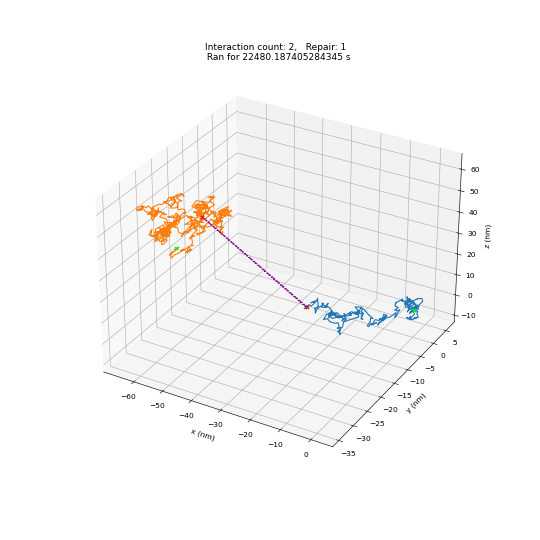

(array([[20315.29557252],
        [20315.41475835]]),
 array([[-23.1810777 , -14.99776436,  10.47447276, -49.97829145,
         -23.18001489,  51.54393108],
        [-22.99518846, -14.81424842,  10.38740558, -49.97829145,
         -23.18001489,  51.54393108]]),
 array([1, 2]),
 array([0, 1]))

In [127]:
ctrw_self_interaction_new((0,0,0), D, jump_t, run_t, min_t, alpha, interaction_range,interaction_range*1.5, plot=1)

### Scrap

In [26]:
# def ctrw_3d_interaction(initial_pos, diff_coeff, diff_time, run_time, min_wait_time, anom_diff_exp,
#                         int_length, interaction_p=0.5, plot=0, return_trajectories=False):
#     """
#     """
#     repair = 0 
#     time1 = 0
#     time2 = 0 
    
#     x1, y1, z1 = initial_pos[0]
#     x2, y2, z2 = initial_pos[1]
    
#     times1 = np.array([time1])
#     times2 = np.array([time2])
    
#     coords1 = np.array([x1, y1, z1])
#     coords2 = np.array([x2, y2, z2])
    
#     interaction_coords = np.array([0,0,0,0,0,0])
#     interaction_times = np.array([0,0])
#     interaction_count = 0
#     int_count_arr = np.array(interaction_count)
#     repair_arr = np.array([repair])

#     while (time1 < run_time or time2 < run_time) and repair==0:
        
#         waiting_time1 = get_waiting_time(min_wait_time, anom_diff_exp)
#         waiting_time2 = get_waiting_time(min_wait_time, anom_diff_exp)
        
#         time1 += waiting_time1  
#         times1 = np.append(times1, time1)
        
#         time2 += waiting_time2
#         times2 = np.append(times2, time2)

#         coords1 = gauss_step_3d(coords1, diff_coeff, diff_time)
#         coords2 = gauss_step_3d(coords2, diff_coeff, diff_time)
        
#         distance = get_distance_3d(coords1[-1],coords2[-1])
        
#         if distance < int_length:
            
#             interaction_count += 1
#             int_coords_temp = np.append(coords1[-1],coords2[-1])
#             repair = interaction_process(interaction_p)
            
#             if interaction_count == 1:
#                 interaction_times = np.array([time1,time2])
#                 interaction_times = np.reshape(interaction_times,(1,len(interaction_times)))
#                 interaction_coords = np.reshape(int_coords_temp,(1,len(int_coords_temp)))
#                 int_count_arr = np.array([interaction_count])
#                 repair_arr = np.array([repair])
                
#             else: 
#                 interaction_times = np.vstack((interaction_times,np.array([time1,time2])))
#                 interaction_coords = np.vstack((interaction_coords,int_coords_temp))
#                 int_count_arr = np.append(int_count_arr,interaction_count)
#                 repair_arr = np.append(repair_arr,repair)


#     data1 = {'t': times1, 'x': coords1[:,0], 'y': coords1[:,1], 'z': coords1[:,2]}
#     df1 = pd.DataFrame(data1)
#     data2 = {'t': times2, 'x': coords2[:,0], 'y': coords2[:,1], 'z': coords2[:,2]}
#     df2 = pd.DataFrame(data2)
    
    
#     """
#     if plot ==1:              
#         %matplotlib notebook
#         fig = plt.figure()
#         ax = plt.axes(projection ='3d')
#         ax.plot3D(df1['x'], df1['y'], df1['z'])
#         ax.plot3D(df2['x'], df2['y'], df2['z'])
#         ax.scatter(df1['x'].iloc[0], df1['y'].iloc[0], df1['z'].iloc[0],marker='x',c='k')
#         ax.scatter(df2['x'].iloc[0], df2['y'].iloc[0], df2['z'].iloc[0],marker='x',c='k')
        
#         if interaction_count > 1:
#             ax.scatter(interaction_coords[:-1,0],interaction_coords[:-1,1],
#                        interaction_coords[:-1,2],c='k')
#             if repair == 1:
#                 ax.scatter(interaction_coords[-1,0],interaction_coords[-1,1],
#                        interaction_coords[-1,2],c='r')
                
#         elif interaction_count == 1:
#             ax.scatter(interaction_coords[0],interaction_coords[1],
#                        interaction_coords[2],c='k')
#             if repair == 1:
#                 ax.scatter(interaction_coords[-0],interaction_coords[1],
#                        interaction_coords[2],c='r')
                       
#     """
#     if return_trajectories:
#         return df1, df2
#     else:
#         return interaction_times, interaction_coords, int_count_arr, repair_arr
            

def ctrw_self_interaction_new(initial_pos, diff_coeff, diff_time, run_time, min_wait_time, anom_diff_exp,
                              int_length,strand_length, interaction_p=0.5, plot=0, return_trajectories=False):
    """
    initial_pos: 2d array e.g. [(x1,y1,z1), (x2,y2,z2)]
    """
    repair = 0 
    time1 = 0
    time2 = 0 
    
    x1, y1, z1 = initial_pos
    x2, y2, z2 = initial_pos + strand_length*unit_vector_single()    
    
    times1 = np.array([time1])
    times2 = np.array([time2])
    
    coords1 = np.array([[x1, y1, z1]])
    coords2 = np.array([[x2, y2, z2]])
    
    interaction_coords = np.array([[0,0,0,0,0,0]])
    interaction_times = np.array([0])
    interaction_count = 0
    int_count_arr = np.array(interaction_count)
    repair_arr = np.array([repair])

    
    while (time1 < run_time and time2 < run_time) and repair==0:
        """
        
        # the particle that is behind in time takes a step
        if time1 < time2:
            waiting_time1 = get_waiting_time(min_wait_time, anom_diff_exp)
            time1 += waiting_time1
            times1 = np.append(times1, time1)
            times1 = np.append(times1, time1)
            coords1 = gauss_step_3d(coords1, diff_coeff, diff_time)
        else:
            waiting_time2 = get_waiting_time(min_wait_time, anom_diff_exp)
            time2 += waiting_time2
            times2 = np.append(times2, time2)
            times2 = np.append(times2, time2)
            coords2 = gauss_step_3d(coords2, diff_coeff, diff_time)
            
        """
    
        time1_t,time2_t,times1_t,times2_t,coords1_t,coords2_t = step_check_time_f(time1,time2,times1,times2,coords1,
                                                                                  coords2,diff_coeff,diff_time,min_wait_time,
                                                                                  anom_diff_exp)
        distance = get_distance_3d(coords1_t[-1],coords2_t[-1])
        
        #repeat increments of time/space until correct spatial dispalcement found
        #distance must be less than strand length
        #Crude implementation currently, ideally just step in space would be recalculated
        
        #print(distance)
        while distance > strand_length:
            print('!')
            
            time1_t,time2_t,times1_t,times2_t,coords1_t,coords2_t = step_check_time_f(time1,time2,times1,times2,coords1,coords2,
                                                                                      diff_coeff,diff_time,min_wait_time,
                                                                                      anom_diff_exp)
            
            distance = get_distance_3d(coords1_t[-1],coords2_t[-1])
                  
        #print(distance)
            
        time1,time2,times1,times2,coords1,coords2 = time1_t,time2_t,times1_t,times2_t,coords1_t,coords2_t
            
        if distance < int_length:
            
            interaction_count += 1
            int_coords_temp = np.append(coords1[-1],coords2[-1])
            repair = interaction_process(interaction_p)
            if time1 < time2 and time1!=0:
                int_time = time1
            else:
                int_time = time2
            
            if interaction_count == 1:
                interaction_times = np.array([int_time])
                interaction_times = np.reshape(interaction_times,(1,len(interaction_times)))
                interaction_coords = np.reshape(int_coords_temp,(1,len(int_coords_temp)))
                int_count_arr = np.array([interaction_count])
                repair_arr = np.array([repair])
                
            else: 
                interaction_times = np.vstack((interaction_times,np.array([int_time])))
                interaction_coords = np.vstack((interaction_coords,int_coords_temp))
                int_count_arr = np.append(int_count_arr,interaction_count)
                repair_arr = np.append(repair_arr,repair)
    
    if repair==1:
        # record final position at time of repair 
        if time1 > time2:
            times2 = np.append(times2, time1)
            coords2 = np.vstack((coords2, coords2[-1]))
        else:
            times1 = np.append(times1, time2)
            coords1 = np.vstack((coords1, coords1[-1]))
    
    if repair==0:
        # correction so run time not exceeded
        if time1 > run_time:
            times1 = times1[:-2]
            coords1 = coords1[:-2]
        if time2 > run_time:
            times2 = times2[:-2]
            coords2 = coords2[:-2]
        if times1[-1] < run_time:
            times1 = np.append(times1, run_time)
            coords1 = np.vstack((coords1, coords1[-1]))
        if times2[-1] < run_time:
            times2 = np.append(times2, run_time)
            coords2 = np.vstack((coords2, coords2[-1]))
    
    data1 = {'t': times1, 'x': coords1[:,0], 'y': coords1[:,1], 'z': coords1[:,2]}
    df1 = pd.DataFrame(data1)
    data2 = {'t': times2, 'x': coords2[:,0], 'y': coords2[:,1], 'z': coords2[:,2]}
    df2 = pd.DataFrame(data2)
    
    if plot==1:              
        %matplotlib notebook
        fig = plt.figure(figsize=(10,10))
        ax = plt.axes(projection ='3d')
        ax.plot3D(df1['x'], df1['y'], df1['z'])
        ax.plot3D(df2['x'], df2['y'], df2['z'])
        ax.set_title('Interaction count: {},   Repair: {} \n Ran for {} s'.format(interaction_count, repair, times1[-1]))
        ax.set_xlabel('x (nm)')
        ax.set_ylabel('y (nm)')
        ax.set_zlabel('z (nm)')
        ax.scatter(df1['x'][0], df1['y'][0], df1['z'][0], marker='x', c='lime')
        ax.scatter(df2['x'][0], df2['y'][0], df2['z'][0], marker='x', c='lime')
        ax.scatter(df1['x'].iat[-1], df1['y'].iat[-1], df1['z'].iat[-1], marker='x', c='red')
        ax.scatter(df2['x'].iat[-1], df2['y'].iat[-1], df2['z'].iat[-1], marker='x', c='red')
        if interaction_count > 1:
            for i, coords in enumerate(interaction_coords):
                ax.plot3D([coords[0], coords[3]], [coords[1], coords[4]], [coords[2], coords[5]], c='k', ls='dotted')
                if repair==1 and i==interaction_count-1:
                    ax.plot3D([coords[0], coords[3]], [coords[1], coords[4]], [coords[2], coords[5]], c='m', ls='dashed')

    if return_trajectories:
        return interaction_times, interaction_coords, int_count_arr, repair_arr, df1, df2
    else:
        return interaction_times, interaction_coords, int_count_arr, repair_arr
        
        
       
def int_time(int_index,i_times,i_counts,count_jk,tj,tk,coordsj,coordsk,int_length,interaction_p=0.5):
        
        i_counts_row = i_counts[-1]
        
        count_jk += 1
        i_coords_temp = np.append(coordsj[-1],coordsk[-1])
        
        repair = interaction_process(interaction_p)
        if tj < tk and tj!=0:
            t_jk = tj
        else:
            t_jk = tk


        i_times = np.vstack(i_times,np.arrya([t_jk]))
        
        i_counts_row[int_index] += 1 
        i_counts = np.vstack(i_counts,i_counts_row)
        
    return i_times,i_counts
            

            

In [131]:
x = np.array([1,4,6,4])
i = np.argsort(x)
x[i]

array([1, 4, 4, 6])